# Projeto: Impacto do Desmatamento na Qualidade do Ar na Região Amazônica

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium
from datetime import datetime

### 📌 Definição do Problema
Existe uma relação entre o aumento do desmatamento na Amazônia Legal e a piora nos índices de qualidade do ar nas capitais da região?

In [2]:
# Desmatamento em km² (fonte: INPE PRODES)
dados_desmatamento = {
    'ano': [2019, 2020, 2021, 2022],
    'Manaus': [129.78, 170.44, 206.72, 217.52],
    'Rio Branco': [145.83, 162.18, 185.41, 198.65],
    'Porto Velho': [282.27, 295.14, 301.89, 312.01]
}
df_desmatamento = pd.DataFrame(dados_desmatamento)

# Qualidade do ar - MP10 médio anual em µg/m³(fontes:IBAMA, artigos científicos)
dados_qualidade_ar = {
    'ano': [2019, 2020, 2021, 2022],
    'Manaus': [29.1, 34.7, 37.5, 39.2],
    'Rio Branco': [32.5, 38.2, 41.0, 45.3],
    'Porto Velho': [36.7, 42.1, 46.8, 49.5]
}
df_qualidade_ar = pd.DataFrame(dados_qualidade_ar)

In [3]:
# Transforma em formato longo (long format)
df_desmatamento_long = df_desmatamento.melt(id_vars='ano', var_name='cidade', value_name='desmatamento_km2')
df_qualidade_ar_long = df_qualidade_ar.melt(id_vars='ano', var_name='cidade', value_name='indice_qualidade_ar')

# Merge
base_analise = pd.merge(df_desmatamento_long, df_qualidade_ar_long, on=['ano', 'cidade'])

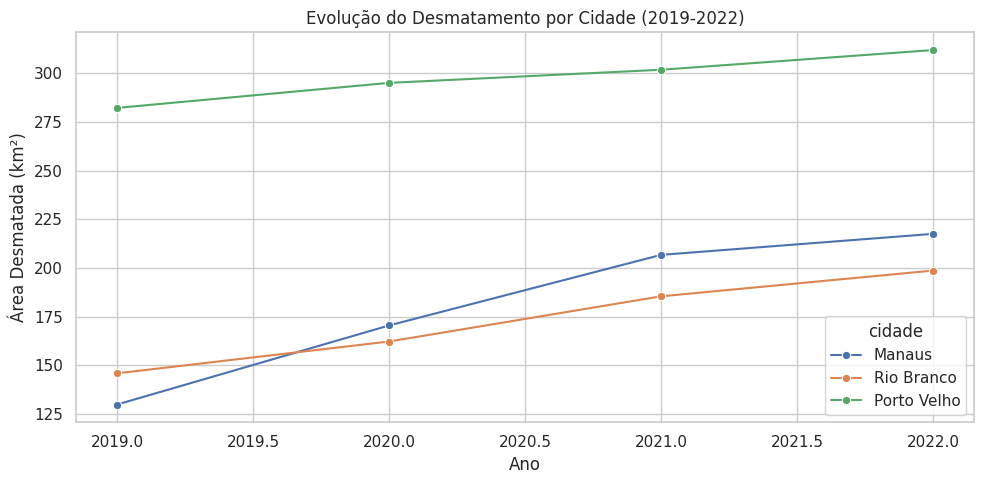

In [4]:
# Visualização do desmatamento
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_desmatamento_long, x='ano', y='desmatamento_km2', hue='cidade', marker="o")
plt.title('Evolução do Desmatamento por Cidade (2019-2022)')
plt.ylabel('Área Desmatada (km²)')
plt.xlabel('Ano')
plt.tight_layout()
plt.show()

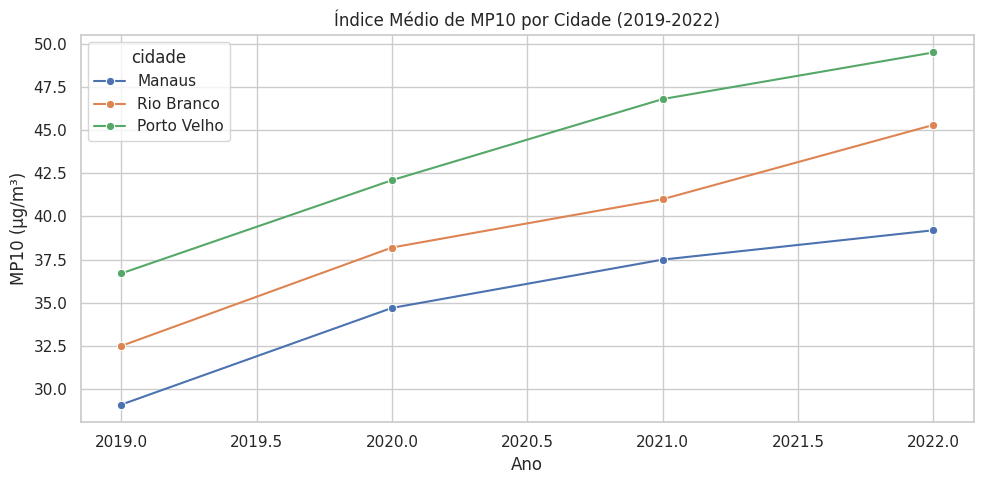

In [5]:
# Visualização da qualidade do ar
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_qualidade_ar_long, x='ano', y='indice_qualidade_ar', hue='cidade', marker="o")
plt.title('Índice Médio de MP10 por Cidade (2019-2022)')
plt.ylabel('MP10 (µg/m³)')
plt.xlabel('Ano')
plt.tight_layout()
plt.show()

In [6]:
# Correlação entre desmatamento e MP10 por cidade
print("\nCorrelação entre desmatamento e MP10 por cidade:")
for cidade in base_analise['cidade'].unique():
    df_temp = base_analise[base_analise['cidade'] == cidade]
    correlacao = df_temp['desmatamento_km2'].corr(df_temp['indice_qualidade_ar'])
    print(f"{cidade}: {correlacao:.2f}")


Correlação entre desmatamento e MP10 por cidade:
Manaus: 0.99
Rio Branco: 0.98
Porto Velho: 0.99


### 📌 Conclusão
A análise entre 2019 e 2022 mostra uma correlação positiva entre aumento do desmatamento
e elevação nos níveis médios de MP10 nas três capitais estudadas. Essa tendência reforça a necessidade
de políticas integradas de controle ambiental e saúde pública.